# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Перечень основных задач:
- 1. Выполнить предобработку данных
    а)заполнить пропуски
    б)ликвидировать дубликаты
    в)преобразовать типы данных
    г)обработать аномалии
-  2.Провести исследовательский анализ данных
-  3.Выявить основные факторы, влияющие на цену квартиры и цену одного квадратного метра
-  4.Визуализировать выводы

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

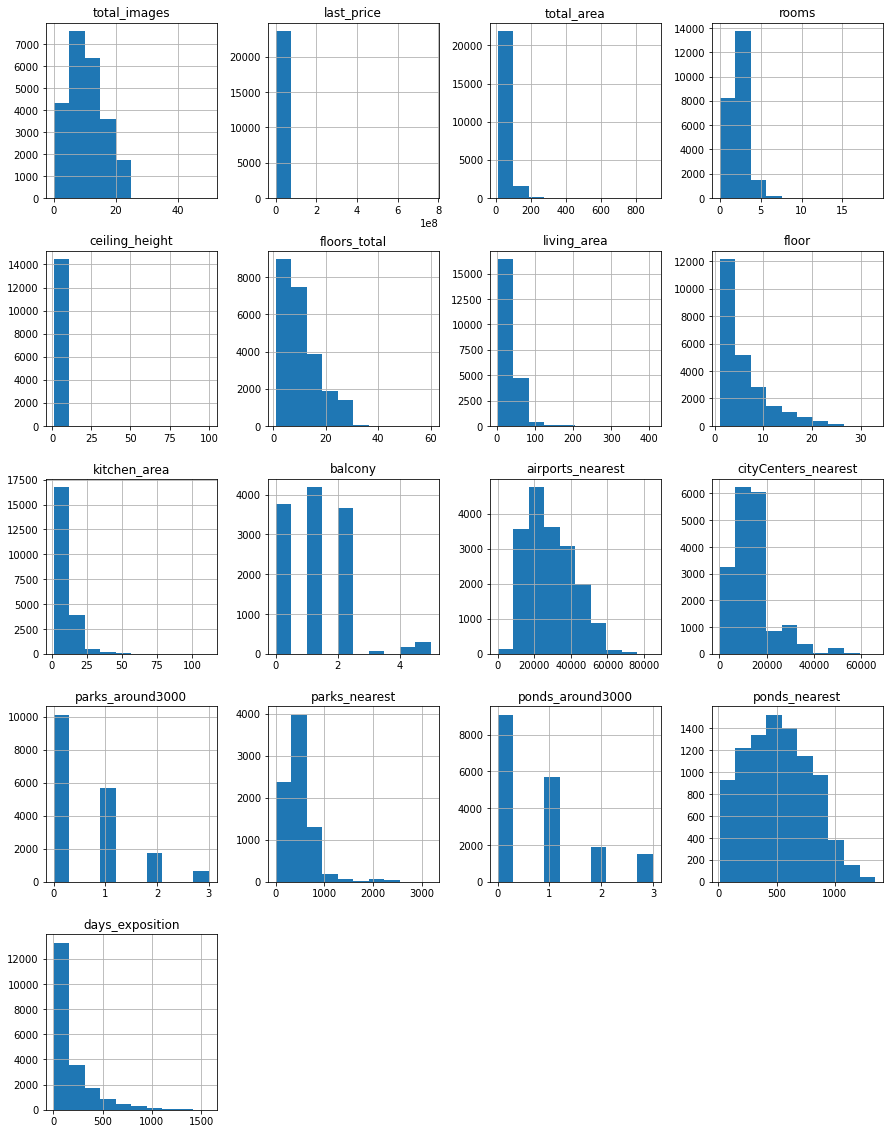

In [3]:
data.hist(figsize=(15, 20));

### Предобработка данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

ПРИЧИНЫ, КОТОРЫЕ МОГЛИ ПРИВЕСТИ К ПРОПУСКАМ:
1. Пропуски могли оставить те, кто заполнял данные, не зная определенную информацию, случайно или считая данную информацию неважной
2. Пропуски могли появиться в следствие сбоя системы сбора данных

Как мы видим, в большинстве столбцов множество пропусков (иногда до половины данных). Удалять их все - не вариант. Потеряем слишком много данных. Исходя из природы данных каждого столбца необходимо подобрать метод обработки пропусков. При этом важно понимать, что, скорее всего, не все пропуски случайного характера. 

In [7]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())


In [10]:
# check
data.shape

(23699, 22)

Высоту потолков лучше заполнить средним арифметическим, так как этот тип данных - float. Тем не менее, даже среднее арифметическое серьезно будет искажать такие представления о данных как дисперсия. Плюс пропусков уж очень много.

In [11]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

Пропущенные данные в 'floors_total' логчнее заполнить медианой, так как это целочисленная переменная, несмотря на то, что она находится в формате float. Учитывая, что пропущенных данных в этом столбце немного, общая статистика не исказится.

In [12]:
data.loc[data['floors_total']<data['floor'], 'floors_total'].count()

37

In [13]:
data = data.loc[data['floors_total']>=data['floor']]

In [14]:
data.loc[data['floors_total']<data['floor'], 'floors_total'].count()

0

In [15]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Всего 50 значений True. Логично предположить, что все пропуски можно заполнить значением False

In [16]:
data['is_apartment'] = data['is_apartment'].fillna('False')

Заполняем False в строковой форме, так как тип переменных object. Позже разберемся с типами переменных...

In [17]:
data.loc[data['living_area']+data['kitchen_area']>data['total_area']*0.9,'living_area'].count()

462

In [18]:
data.loc[data['kitchen_area']>data['total_area'],'kitchen_area'].count()

0

In [19]:
    data.loc[data['total_area']<=data['total_area'].quantile(q=0.25),'kitchen_area']=data.loc[data['total_area']<=\
        data['total_area'].quantile(q=0.25), 'kitchen_area'].fillna(data['kitchen_area'].quantile(q=0.125))

In [20]:
data.loc[(data['total_area'].quantile(q=0.25)<data['total_area'])& (data['total_area']<=data['total_area'].\
        quantile(q=0.5)), 'kitchen_area']=data.loc[(data['total_area'].quantile(q=0.25)<data['total_area'])& \
        (data['total_area']<=data['total_area'].quantile(q=0.5)), 'kitchen_area'].fillna(data['kitchen_area'].\
                                                                                             quantile(q=0.375))

In [21]:
data.loc[(data['total_area'].quantile(q=0.5)<data['total_area'])& (data['total_area']<data['total_area'].\
        quantile(q=0.75)), 'kitchen_area']=data.loc[(data['total_area'].quantile(q=0.5)<data['total_area'])& \
        (data['total_area']<data['total_area'].quantile(q=0.75)), 'kitchen_area'].fillna(data['kitchen_area'].\
                                                                                             quantile(q=0.625))

In [22]:
data.loc[data['total_area']>=data['total_area'].quantile(q=0.75), 'kitchen_area']=data.loc[data['total_area']\
            >=data['total_area'].quantile(q=0.75), 'kitchen_area'].fillna(data['kitchen_area'].quantile(q=0.875))

In [23]:
data.loc[data['kitchen_area']>data['total_area'],'kitchen_area'].count()

0

In [24]:
data.loc[data['total_area']<=data['total_area'].quantile(q=0.25),'living_area']=data.loc[data['total_area']<=\
    data['total_area'].quantile(q=0.25), 'living_area'].fillna(data['living_area'].quantile(q=0.125))

In [25]:
data.loc[(data['total_area'].quantile(q=0.25)<data['total_area'])& (data['total_area']<=data['total_area'].\
        quantile(q=0.5)), 'living_area']=data.loc[(data['total_area'].quantile(q=0.25)<data['total_area'])& \
        (data['total_area']<=data['total_area'].quantile(q=0.5)), 'living_area'].fillna(data['living_area'].\
                                                                                             quantile(q=0.375))

In [26]:
data.loc[(data['total_area'].quantile(q=0.5)<data['total_area'])& (data['total_area']<data['total_area'].\
        quantile(q=0.75)), 'living_area']=data.loc[(data['total_area'].quantile(q=0.5)<data['total_area'])& \
        (data['total_area']<data['total_area'].quantile(q=0.75)), 'living_area'].fillna(data['living_area'].\
                                                                                             quantile(q=0.625))

In [27]:
data.loc[data['total_area']>=data['total_area'].quantile(q=0.75), 'living_area']=data.loc[data['total_area']\
            >=data['total_area'].quantile(q=0.75), 'living_area'].fillna(data['living_area'].quantile(q=0.875))

In [28]:
data.loc[data['living_area']+data['kitchen_area']>data['total_area']*0.9,'living_area'].count()

818

In [29]:
data = data.loc[data['living_area']+data['kitchen_area']<data['total_area']*0.9]

In [30]:
data.loc[data['living_area']+data['kitchen_area']>data['total_area']*0.9,'living_area'].count()

0

In [31]:
data['balcony'].value_counts()

1.0    4094
0.0    3615
2.0    3507
5.0     297
4.0     175
3.0      79
Name: balcony, dtype: int64

In [32]:
data['balcony'] = data['balcony'].fillna(0)

Если пропуск - скорее всего, в квартире просто нет балконов. Поэтому 0

In [33]:
data = data.dropna(subset = ['locality_name'])
data['locality_name'].isna().sum()

0

Учитывая, что пропусков в этом столбце немного и данные из него носят ключевой характер, можно удалить строчки с пропусками. Нам их нечем заменить.


Перед заполнением пропусков в картографических данных, удобнее и правильнее будет разбить данные на группы по населенному пункту, так как логично что общее среднее расстояние до аэропорта будет не совсем репрезентативным, учитывая, что все квартиры разбросаны по разным местам. Зная, что квартира с пропуском расстояния до аэропорта расположена в определенном населенном пункте, разумно будет предположить, что пропущенное расстояние приближено к усредненному расстоянию до аэропорта ее соседей.

In [34]:
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform(np.mean))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22765 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22765 non-null  int64  
 1   last_price            22765 non-null  float64
 2   total_area            22765 non-null  float64
 3   first_day_exposition  22765 non-null  object 
 4   rooms                 22765 non-null  int64  
 5   ceiling_height        22765 non-null  float64
 6   floors_total          22765 non-null  float64
 7   living_area           22765 non-null  float64
 8   floor                 22765 non-null  int64  
 9   is_apartment          22765 non-null  object 
 10  studio                22765 non-null  bool   
 11  open_plan             22765 non-null  bool   
 12  kitchen_area          22765 non-null  float64
 13  balcony               22765 non-null  float64
 14  locality_name         22765 non-null  object 
 15  airports_nearest   

К сожалению, таким способом удалось заполнить довольно-таки немного пропусков расстояния до ближайшего аэропорта. Так в некоторых случаях, расстояние до ближайшего аэропорта не указано у всех квартир населенного пункта. Но ноль ставить в таких случаях вряд ли будет корректно, так как он может свидетельствовать о крайне близком расположении аэропорта и исказить гистограммы, что приведет к неверным выводам. Такие пропуски лучше оставить

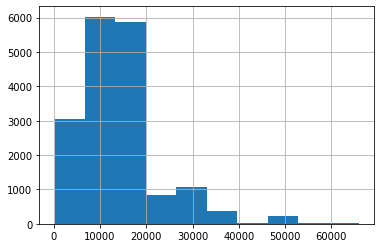

In [35]:
data['cityCenters_nearest'].hist();

In [36]:
data.loc[data['cityCenters_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.771499,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.771499,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.771499,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.750000,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.771499,9.0,17.00,2,False,...,6.00,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.500000,5.0,45.50,3,False,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.771499,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.771499,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.771499,3.0,29.70,1,False,...,10.00,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')\
        ['cityCenters_nearest'].transform(np.mean))

In [38]:
data['parks_nearest'] = data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform(np.mean))

In [39]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform(np.mean))

Выведем общую информацию и первые 30 строчек чтобы убедиться, что схема заполнения пропусков в зависимости от населенного пункта работает

In [40]:
data.info()
data.head(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22765 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22765 non-null  int64  
 1   last_price            22765 non-null  float64
 2   total_area            22765 non-null  float64
 3   first_day_exposition  22765 non-null  object 
 4   rooms                 22765 non-null  int64  
 5   ceiling_height        22765 non-null  float64
 6   floors_total          22765 non-null  float64
 7   living_area           22765 non-null  float64
 8   floor                 22765 non-null  int64  
 9   is_apartment          22765 non-null  object 
 10  studio                22765 non-null  bool   
 11  open_plan             22765 non-null  bool   
 12  kitchen_area          22765 non-null  float64
 13  balcony               22765 non-null  float64
 14  locality_name         22765 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.000000,2.0,755.000000,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.771499,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,577.236486,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.771499,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.000000,2.0,574.000000,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.771499,14.0,50.30,9,False,...,14.50,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.000000,3.0,234.000000,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.000000,1.0,48.000000,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.771499,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.771499,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,501.100000,0.0,593.740741,155.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.771499,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.500000,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,498.415062,0.0,521.235056,289.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.670000,12.0,20.30,3,False,...,8.50,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.000000,2.0,553.000000,137.0


Проанализировав результат обработки, приходим к выводу, что 1)пропуски, где это возможно, заполнены, 2)в некоторых квартирах полностью отсутствует информация и о ближайшем аэропорте, и о центре города, и о парке и пруде. Но, к сожалению, удалить эти данные будет ошибкой, так как мы таким образом удалим информацию о целых населенных пунктах.

Следующем шагам заполним пропуски в данных типа 'around 3000'. Скорее всего, пропуск подразумевает отсутствие объекта (парк, пруда) в радиусе 3 км. Поэтому просто проставляем 0

In [41]:
data[['parks_around3000', 'ponds_around3000']]=data[['parks_around3000', 'ponds_around3000']].fillna(0.0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22765 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22765 non-null  int64  
 1   last_price            22765 non-null  float64
 2   total_area            22765 non-null  float64
 3   first_day_exposition  22765 non-null  object 
 4   rooms                 22765 non-null  int64  
 5   ceiling_height        22765 non-null  float64
 6   floors_total          22765 non-null  float64
 7   living_area           22765 non-null  float64
 8   floor                 22765 non-null  int64  
 9   is_apartment          22765 non-null  object 
 10  studio                22765 non-null  bool   
 11  open_plan             22765 non-null  bool   
 12  kitchen_area          22765 non-null  float64
 13  balcony               22765 non-null  float64
 14  locality_name         22765 non-null  object 
 15  airports_nearest   

In [42]:
data['days_exposition'].head(10)

0       NaN
1      81.0
2     558.0
3     424.0
4     121.0
5      55.0
6     155.0
8     189.0
9     289.0
10    137.0
Name: days_exposition, dtype: float64

Пропуски в ['days_exposition'] свидетельствуют о том, что квартиры еще не проданы. Поэтому оставляем пропуски

ВСЕ ВОЗМОЖНЫЕ ПРОПУСКИ ЗАПОЛНЕНЫ!!!

МЫ ПОТЕРЯЛИ ОКОЛО 900 НАБЛЮДЕНИЙ - НЕКРИТИЧНО

В ходе исследования данных было обнаружено, что тип многих данных не соответствуют их реальной природе.

In [43]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.000000,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.771499,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,577.236486,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.771499,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.000000,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.771499,14.0,50.3,9,False,...,14.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.000000,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.000000,121.0


Необходимо изменить следующие столбцы с данными: last_price, floors_total, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Так как по своей сути это целочисленные данные, выраженные в формате float. Надо вернуть их в int

In [44]:
for i in ('last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',\
          'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'):
    data[i] = data[i].convert_dtypes()
    data[i] = data[i].astype('Int64')

Привел нужные столбцы к типу данных Int64 (в отличие от int он игнорирует пропуски) 

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22765 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22765 non-null  int64  
 1   last_price            22765 non-null  Int64  
 2   total_area            22765 non-null  float64
 3   first_day_exposition  22765 non-null  object 
 4   rooms                 22765 non-null  int64  
 5   ceiling_height        22765 non-null  float64
 6   floors_total          22765 non-null  Int64  
 7   living_area           22765 non-null  float64
 8   floor                 22765 non-null  int64  
 9   is_apartment          22765 non-null  object 
 10  studio                22765 non-null  bool   
 11  open_plan             22765 non-null  bool   
 12  kitchen_area          22765 non-null  float64
 13  balcony               22765 non-null  Int64  
 14  locality_name         22765 non-null  object 
 15  airports_nearest   

In [46]:
data['parks_around3000']

0        1
1        0
2        1
3        2
4        2
        ..
23693    1
23694    1
23695    0
23696    0
23698    0
Name: parks_around3000, Length: 22765, dtype: Int64

Отдельно надо изменить данные в стобце 'first_day_exposition'. Для адекватного отображения времени

In [47]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

ПЕРЕХОДИМ К ОБРАБОТКЕ ДУБЛИКАТОВ И АНОМАЛИЙ

In [48]:
data['locality_name']=data['locality_name'].str.replace('ё', 'е').str.replace('поселок городского типа', 'поселок').\
    str.replace('городской поселок', 'поселок')
data['locality_name'].value_counts()



Санкт-Петербург                      15146
поселок Мурино                         501
поселок Шушары                         429
Всеволожск                             379
Пушкин                                 361
                                     ...  
деревня Курковицы                        1
садовое товарищество Садко               1
поселок Гладкое                          1
садовое товарищество Приладожский        1
поселок Каложицы                         1
Name: locality_name, Length: 319, dtype: int64

ПЕРЕХОДИМ К ПОИСКУ АНОМАЛИЙ И ИХ УСТРАНЕНИЮ

In [49]:
data['ceiling_height'].unique()
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] *= 0.1


Не стал отображать просмотр всех столбцов. Отобразил только высоту потолка, потому что не нашел аномалий в других данных

In [50]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,765.00","22,765.00","22,765.00","19,706.00","22,765.00","22,765.00","22,765.00","22,765.00","22,765.00"
min,0.00,18.00,1.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,8.30,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [51]:
data['rooms'].describe()

count    22765.000000
mean         2.079640
std          1.069879
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

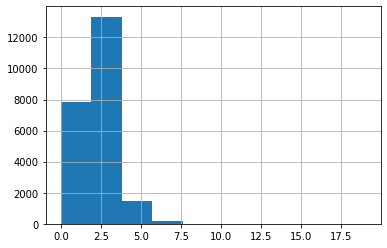

In [52]:
data['rooms'].hist();

In [53]:
data = data.loc[(8>data['rooms']) & (1<=data['rooms'])]

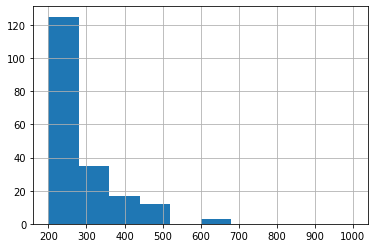

In [54]:
data['total_area'].hist(range=(200,1000));

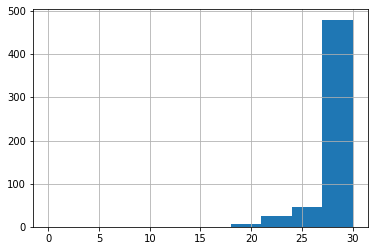

In [55]:
data['total_area'].hist(range=(0,30));

In [56]:
data = data.loc[(200>=data['total_area'])& (15<=data['total_area'])]

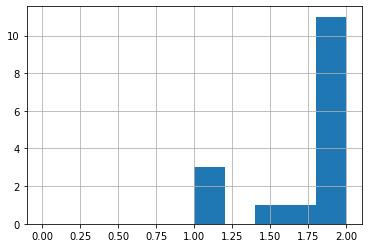

In [57]:
data['ceiling_height'].hist(range=(0,2));

In [58]:
data = data.loc[2<=data['ceiling_height']]

Потолки ниже 2х метров - явная аномалия

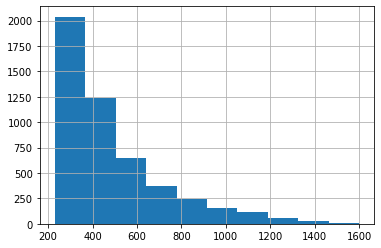

In [59]:
data['days_exposition'].hist(range=(230,1600));

По гистограмме видно, что идет плавное снижение кол-ва долгосрочных объявлений. Поэтому, я думаю, 1580 дней - это не аномалия, а просто редкость, которая вполне вписывается в природу распределения. Но так как редкости мы тоже удаляем, думаю можно удалить все квартиры, которые продаются более 1200 дней

In [60]:
data.loc[data['days_exposition'].isna()==False] = data.loc[data['days_exposition']<=1200]

In [61]:
data['last_price'].describe()

count    2.236500e+04
mean     6.019900e+06
std      6.235209e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.600000e+06
75%      6.680000e+06
max      3.300000e+08
Name: last_price, dtype: float64

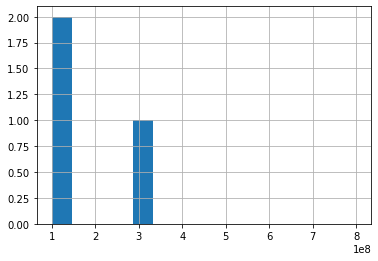

In [62]:
data['last_price'].hist(bins=30, range=(100000000,800000000));

In [63]:
data = data.loc[300000000>=data['last_price']]

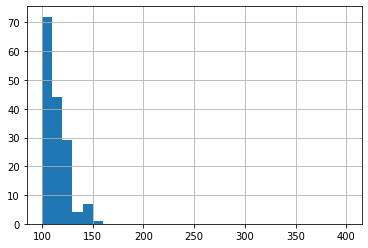

In [64]:
data['living_area'].hist(bins=30, range = (100,400));

In [65]:
data = data.loc[(150>=data['living_area']) & (data['living_area']>4)]

In [66]:
data['kitchen_area'].describe()

count    22360.000000
mean        10.184877
std          4.971499
min          1.300000
25%          7.000000
50%          9.000000
75%         11.600000
max         93.200000
Name: kitchen_area, dtype: float64

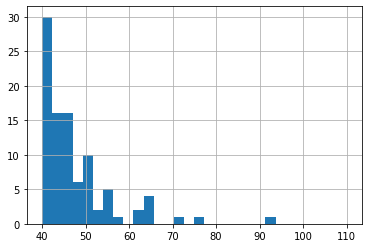

In [67]:
data['kitchen_area'].hist(bins=30, range = (40,110));

In [68]:
data = data.loc[(60>=data['kitchen_area']) & (3<=data['kitchen_area'])]

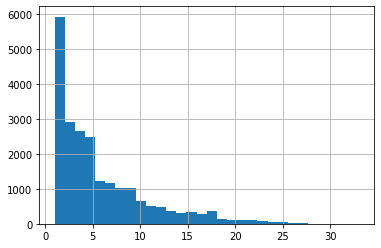

In [69]:
data['floor'].hist(bins=30);

С данными об этажах аномалий не обнаружено

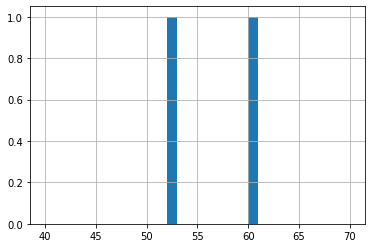

In [70]:
data['floors_total'].hist(bins=30,range=(40,70));

In [71]:
data=data.loc[data['floors_total']<40]

2 высоких здания вряд ли являются аномалиями. Просто небоскребы. Но так как это редкие значения, удалим их

In [72]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,341.00","22,341.00","22,341.00","19,343.00","22,341.00","22,341.00","22,341.00","22,341.00","22,341.00"
min,1.00,18.00,2.00,1.00,"12,190.00",5.40,3.00,1.00,1.00
max,7.00,200.00,8.30,"1,200.00","289,238,400.00",147.20,58.40,33.00,36.00


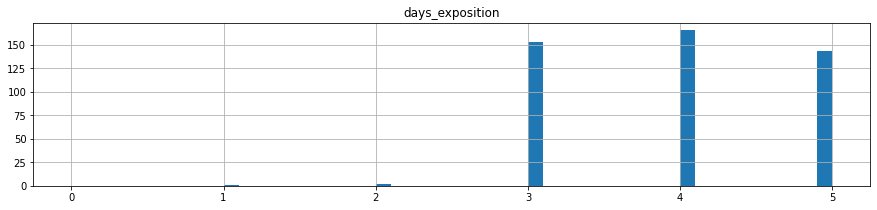

In [73]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

In [74]:
# check
data.rooms.value_counts().to_frame()

,rooms
1.0,7696
2.0,7684
3.0,5556
4.0,1083
5.0,249
6.0,53
7.0,20


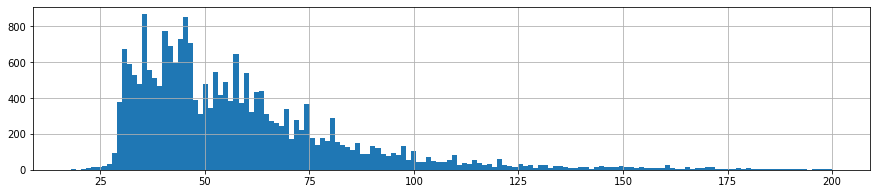

In [75]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

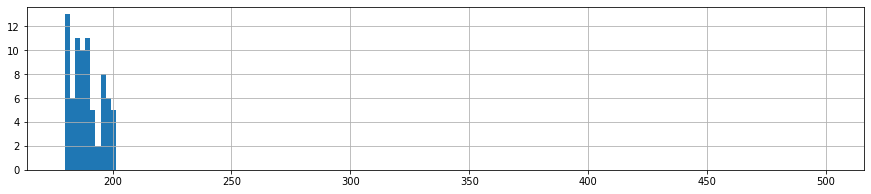

In [76]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [77]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,29.00,2.50,4.00,"1,000,000.00",13.10,5.00,1.00,2.00
0.5,2.00,52.00,2.77,95.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.9,3.00,91.00,3.00,447.00,"10,300,000.00",52.00,15.00,13.00,22.00
0.9976,6.00,185.00,4.00,"1,138.32","47,815,200.00",115.19,42.44,25.00,27.00


### Посчитайте и добавьте в таблицу новые столбцы

ЦЕНА ОДНОГО КВАДРАТНОГО МЕТРА

In [78]:
data["price_of_squared_metr"]=data['last_price']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_squared_metr
0,20.0,13000000,108.0,2019-03-07,3.0,2.700000,16,51.0,8.0,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,<NA>,120370.37037
1,7.0,3350000,40.4,2018-12-04,1.0,2.771499,11,18.6,1.0,False,...,2,поселок Шушары,12817,18603,0,<NA>,0,577,81,82920.792079
2,10.0,5196000,56.0,2015-08-20,2.0,2.771499,5,34.3,4.0,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785.714286
3,0.0,64900000,159.0,2015-07-24,3.0,2.771499,14,50.3,9.0,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176.100629
4,2.0,10000000,100.0,2018-06-19,2.0,3.030000,14,32.0,13.0,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000.0


ДЕНЬ НЕДЕЛИ ПУБЛИКАЦИИ (0 - ПОНЕДЕЛЬНИК, 1 - остальные дни)

In [79]:
data['publication_day_of_week'] = data['first_day_exposition'].dt.dayofweek
data.loc[data['publication_day_of_week']!=0, 'publication_day_of_week']=1
data['publication_day_of_week']

0        1
1        1
2        1
3        1
4        1
        ..
23693    1
23694    1
23695    0
23696    1
23698    1
Name: publication_day_of_week, Length: 22341, dtype: int64

ГОД ПУБЛИКАЦИИ

In [80]:
data['publication_year'] = data['first_day_exposition'].dt.year
data['publication_year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23693    2016
23694    2017
23695    2018
23696    2018
23698    2017
Name: publication_year, Length: 22341, dtype: int64

ТИП ЭТАЖА КВАРТИРЫ

In [81]:
data['type_of_floor'] = 'другой'
data.loc[data['floor']==data['floors_total'], 'type_of_floor'] = 'последний'
data.loc[data['floor']==1, 'type_of_floor'] = 'первый'
data['type_of_floor'].value_counts()

другой       16494
последний     3097
первый        2750
Name: type_of_floor, dtype: int64

In [82]:
data.loc[data['floor']<1, 'floor'].count()

0

РАССТОЯНИЕ В КИЛОМЕТРАХ ДО ЦЕНТРА ГОРОДА

In [83]:
data['distance_to_citycentr_km'] = data.loc[data['cityCenters_nearest'].isna() == False, 'cityCenters_nearest']/1000
data['distance_to_citycentr_km'] = data['distance_to_citycentr_km'].astype('Int64')
data['distance_to_citycentr_km']

0          16
1          18
2          13
3           6
4           8
         ... 
23693      34
23694       4
23695    <NA>
23696    <NA>
23698    <NA>
Name: distance_to_citycentr_km, Length: 22341, dtype: Int64

### Проведите исследовательский анализ данных

0    2.0
dtype: float64

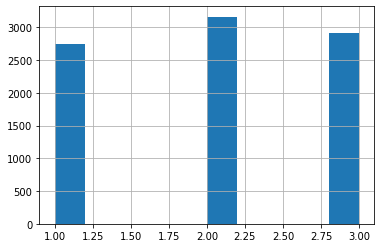

In [84]:
data['floor'].hist(range=(1,3))
data['floor'].mode()

<AxesSubplot:>

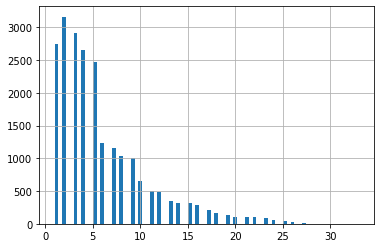

In [85]:
# check
data['floor'].hist(bins = 80)

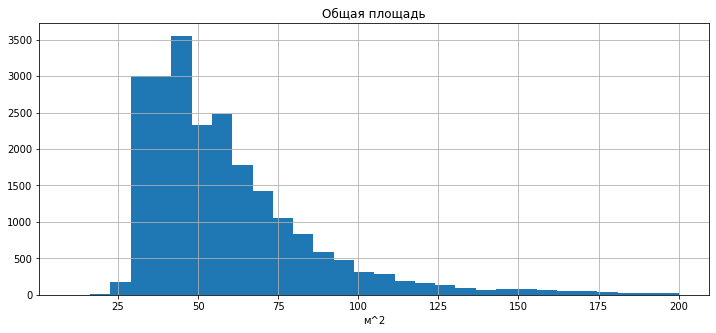

In [86]:
data.hist(column = 'total_area', bins = 30, range=(10,200), figsize = (12,5));
plt.title('Общая площадь');
plt.xlabel('м^2');

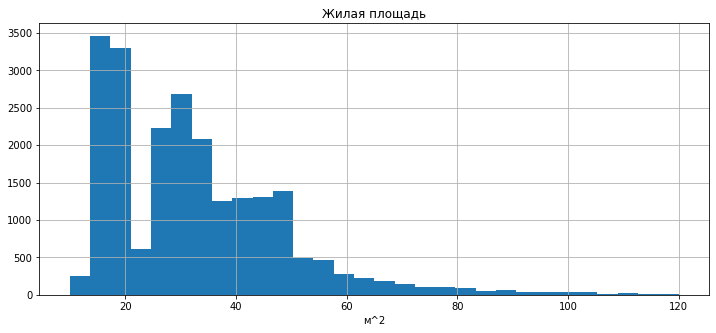

In [87]:
data.hist(column = 'living_area', bins = 30, range = (10,120), figsize = (12,5));
plt.title('Жилая площадь');
plt.xlabel('м^2');

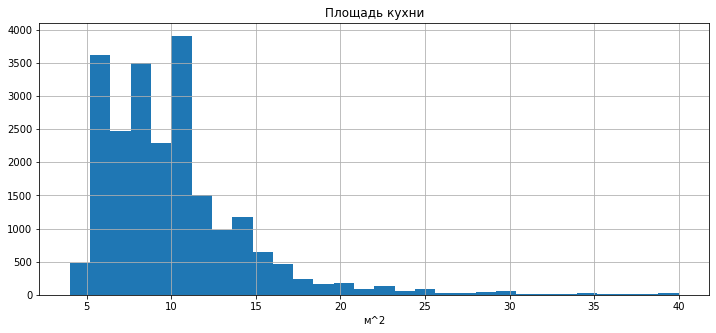

In [88]:
data.hist(column = 'kitchen_area', bins = 30, range = (4,40), figsize = (12,5));
plt.title('Площадь кухни');
plt.xlabel('м^2');

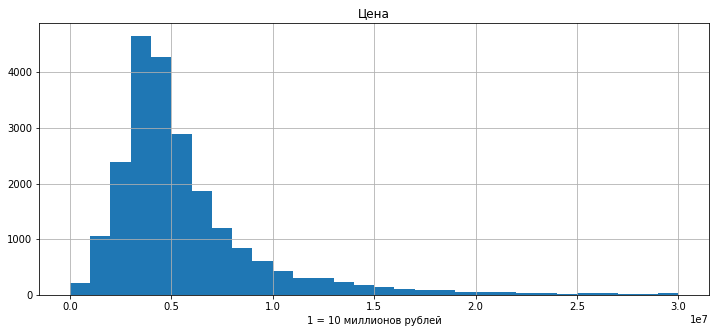

In [89]:
data.hist(column = 'last_price', bins = 30, range=(0,30000000), figsize = (12,5));
plt.title('Цена');
plt.xlabel('1 = 10 миллионов рублей');

Большинство квартир стоят в рамках 5 миллионов рублей

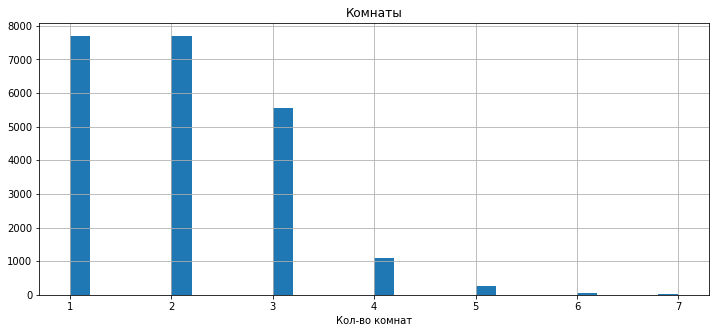

In [90]:
data.hist(column = 'rooms', bins = 30, figsize = (12,5));
plt.title('Комнаты');
plt.xlabel('Кол-во комнат');

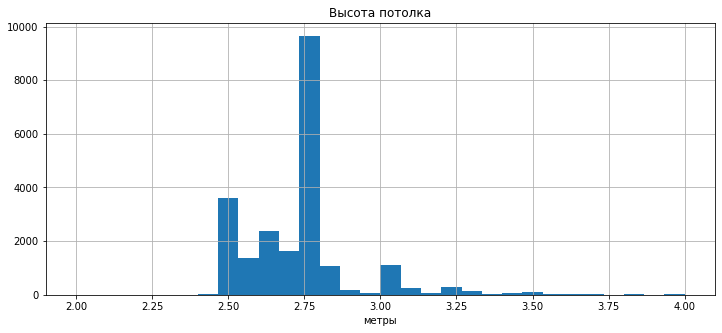

In [91]:
data.hist(column = 'ceiling_height', bins = 30, range= (2,4), figsize = (12,5));
plt.title('Высота потолка');
plt.xlabel('метры');

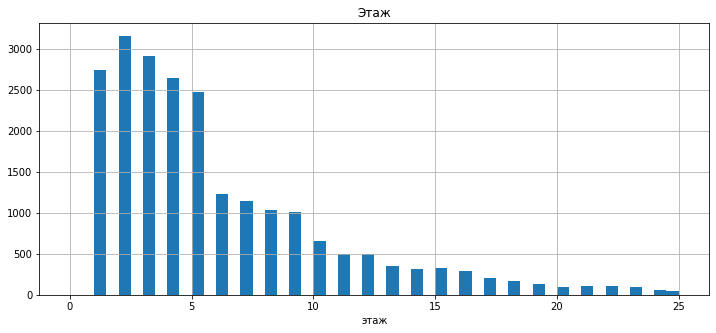

In [92]:
data.hist(column ='floor', bins = 50, range = (0,25), figsize = (12,5));
plt.title('Этаж');
plt.xlabel('этаж');

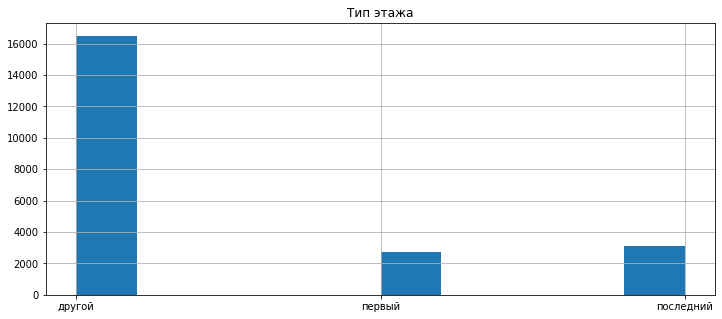

In [93]:
data['type_of_floor'].hist(figsize = (12,5));
plt.title('Тип этажа');

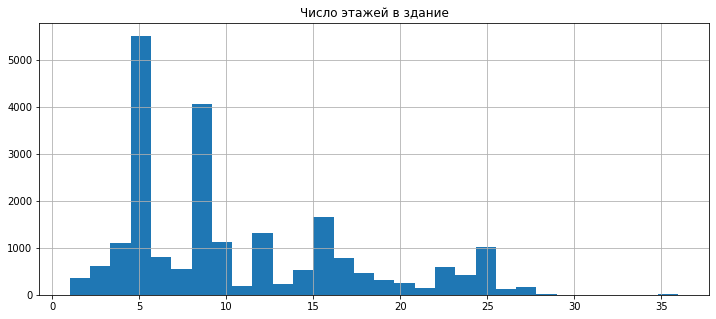

In [94]:
data.hist(column = 'floors_total', bins = 30, figsize = (12,5));
plt.title('Число этажей в здание');

In [95]:
data['floors_total'].mode()

0    5
dtype: Int64

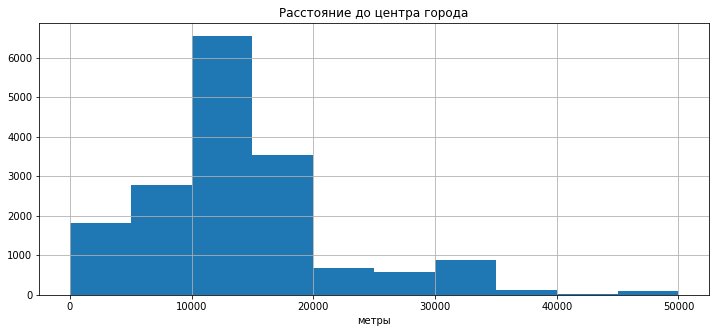

In [96]:
data.hist('cityCenters_nearest', range = (0,50000), figsize = (12,5));
plt.title('Расстояние до центра города');
plt.xlabel('метры');

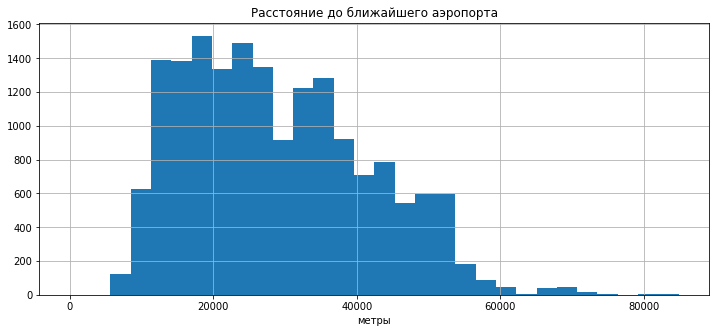

In [97]:
data.hist(column = 'airports_nearest', bins=30, figsize = (12,5));
plt.title('Расстояние до ближайшего аэропорта');
plt.xlabel('метры');

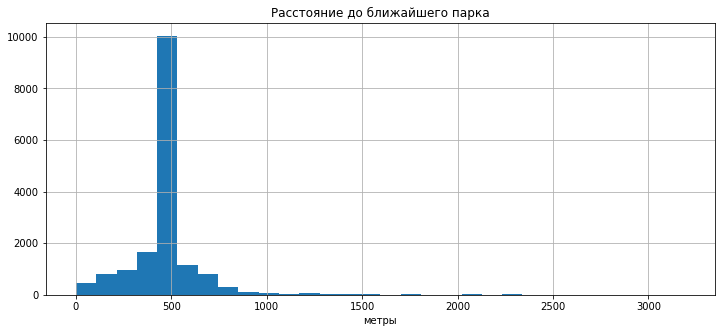

In [98]:
data.hist(column = 'parks_nearest', bins=30, figsize = (12,5));
plt.title('Расстояние до ближайшего парка');
plt.xlabel('метры');

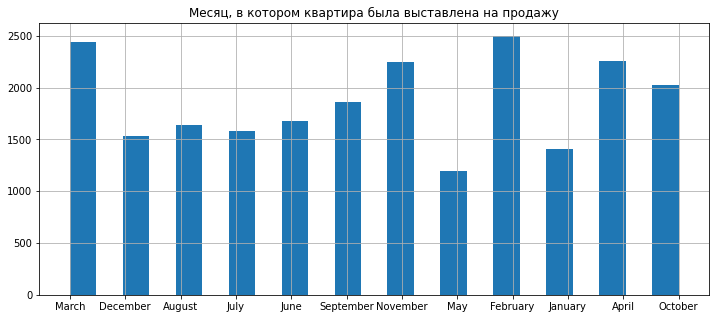

In [99]:
data['first_day_exposition'].dt.month_name().hist(bins=23, figsize=(12,5));
plt.title('Месяц, в котором квартира была выставлена на продажу');

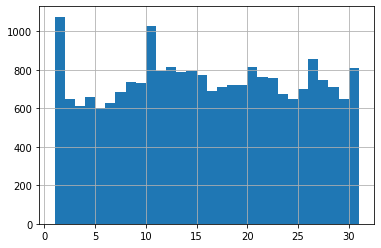

In [100]:
data['first_day_exposition'].dt.day.hist(bins=30);

Распределение по дням можно условно назвать равномерным, нельзя с уверенностью сказать о предпочтительности каких-то определенных дней.

#### Описание наблюдений:
1) ни одно распределение нельзя назвать нормальным, все они ассиметричны, это говорит о мощных выбросах (речь идет, скорее всего, о дорогих квартирах)

2) total area: большинство квартир имеют общую площадь менее 100 м^2, мода соответственно около 40 м^2 (скорее всего это двукомнатные квартиры)

3) living area: соответствует общей площади, при вычете таких помещений как кухня, ванна, туалет и т.д.(мода - около 17 м^2)

4) kitchen area: также соответствует предыдущим двум параметрам (мода - около 10м^2).

5) last price: Мода - 5 миллионов рублей. Большинство квартир (около 98% - это квартиры до 300 миллионов). 

6) rooms: преобладают однокомнатные, двукомнатные и трехкомнатные квартиры

7) ceiling height: мода - потолки около 2.7 метра. Стандартные потолки

8) floor: подавляющее большинство проданных квартир расположены на первом, втором и третьем этаже. Мода - 2ой этаж. Вероятно это объясняется тем, что селах и в деревнях, почти все жилье малоэтажное. Да и на окраинах города тоже. Поэтому возникает такой перекос. Плюс 1, 2, 3ий этажи есть во всех домах, то есть их впринципе существенно больше.

9) floors_total: Мода - 5тиэтажные. Есть небоскребы выше 33 этажей (выбросы). Мы их уже удалили выше

10) first_day_exposition: динамика объявлений о продаже квартиры носит цикличный характер по месяцам. Распределение по дням можно условно назвать равномерным, нельзя с уверенностью сказать о предпочтительности каких-то определенных дней.

11) cityCenters_nearest: большинство проданной недвижимости расположено на расстояние 10-20 км от центра города. Вероятно, это объясняется тем, что ближе 8 км расположены в большей степени деловые и культурные районы, в меньшей - жилые районы. Тем более, близость к центру, скорее всего, характеризуется дороговизной квартир.

12) airports_nearest: большинство проданной недвижимости расположено на расстояние от 20 до 40 км от аэропорта

13) parks_nearest: проданные квартиры расположены в среднем на расстояние 500 м от ближйшего парка. При этом очень малый разброс. Можно предположить, что такое расположение парков есть результат целенаправленной деятельности местной администрации. Хотя изначально у нас было очень много пропусков в этом столбце (15 тыс), взможно, сильная центральная тенденция является следствием заполнения пропусков медианой.

14)заполнение множества пропусков медианной или средним арифметическим усиливают центральную тенденцию на графиках, что может искажать гистограммы

count    19343.000000
mean       175.669493
std        205.801357
min          1.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1200.000000
Name: days_exposition, dtype: float64

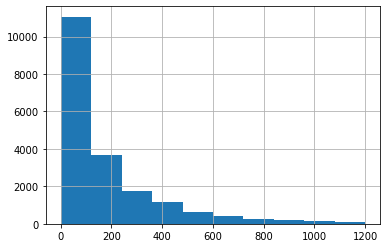

In [101]:
data['days_exposition'].hist()
data['days_exposition'].describe()

Анализ скорости продажи квартир:

Среднее арифметическое: 176 дней в среднем нужно чтобы продать квартиру (округлил). Не очень репрезентативно, учитывая, что 176 находится намного дальше второго квартиля.

Медиана: 95 дней

Условно будем считать 25% продаж быстрыми и 25% долгими, остальные 50% средними по времени.

Таким образом, быстрой продажей можно считать, если объявление висело не больше 45 дней,
средней от 45 до 228, долгой, если более 228 дней

In [102]:
data['days_exposition'].mode()

0    45
dtype: Int64

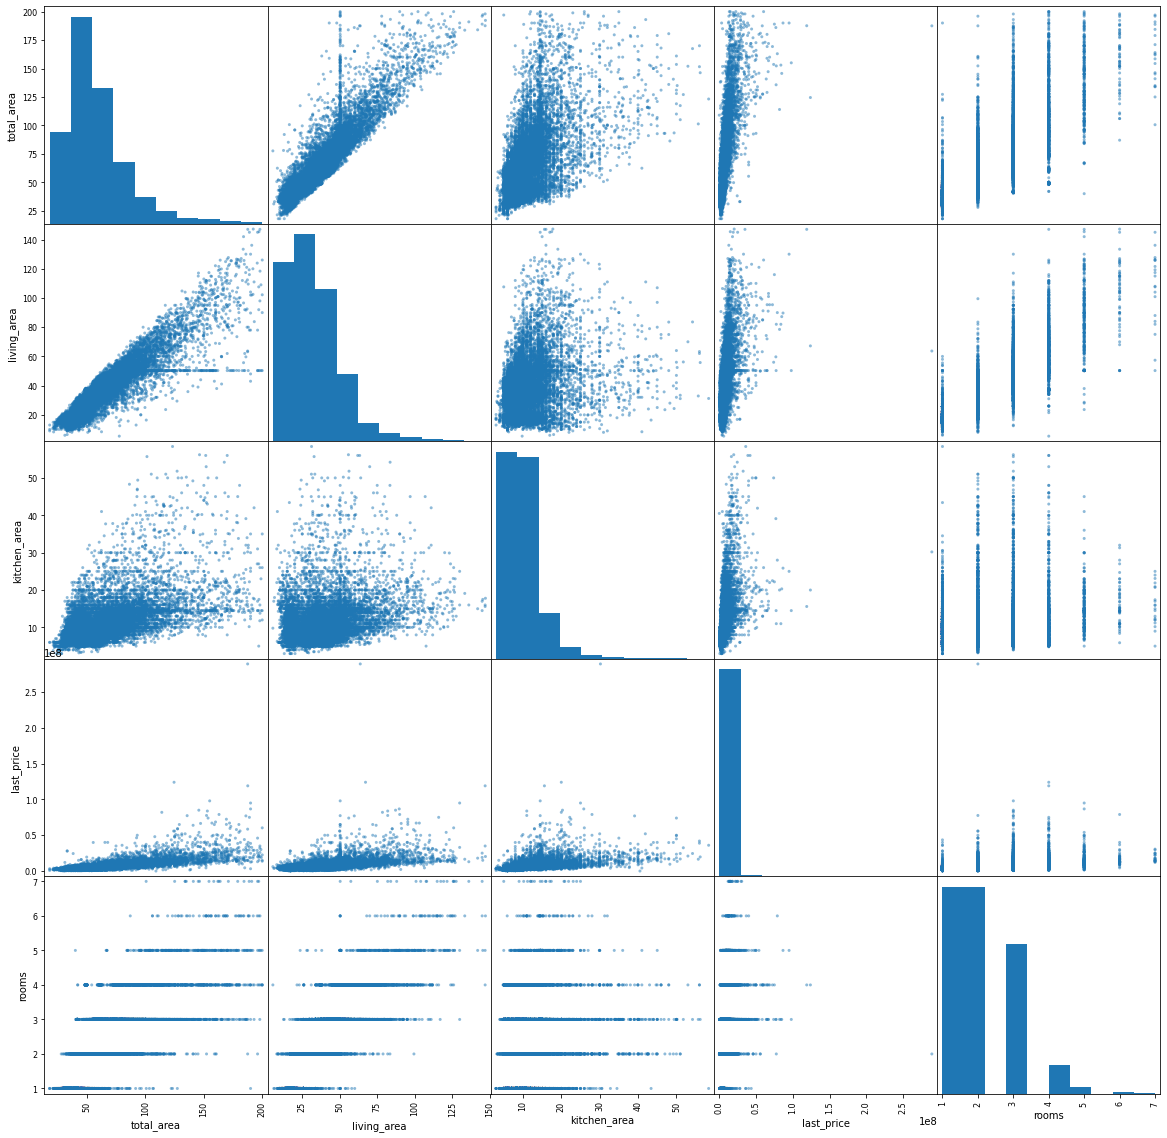

In [103]:
pd.plotting.scatter_matrix(data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms']], figsize = (20,20));

На матрице диаграмм рассеивания ясно видно следующее:
Цена имеет практически идентичную взаимосвязь с общей площадью, жилой площадью и площадью кухни. Поэтому можно убрать площадь кухни и жилую площадь, и оставить только общую, как объединяющую две последние. Для остальных факторов лучше построить отдельные графики. Для first_day_exposition и type_of_floor сделаем отдельные графики


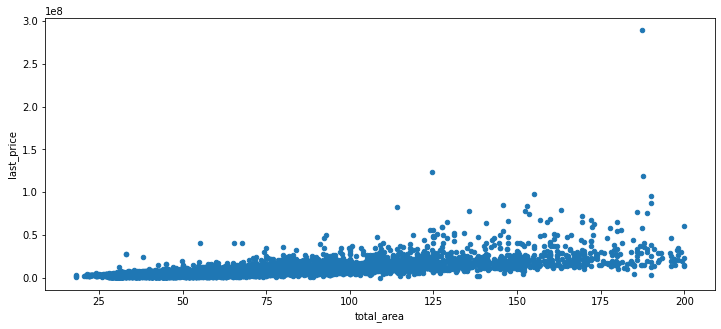

In [104]:
data.plot('total_area', 'last_price', kind='scatter', figsize=(12,5));

In [105]:
data[['total_area', 'last_price']].corr()

,total_area,last_price
total_area,1.000000,0.694558
last_price,0.694558,1.000000


Наблюдается существенная корреляция между ценой и общей площадью

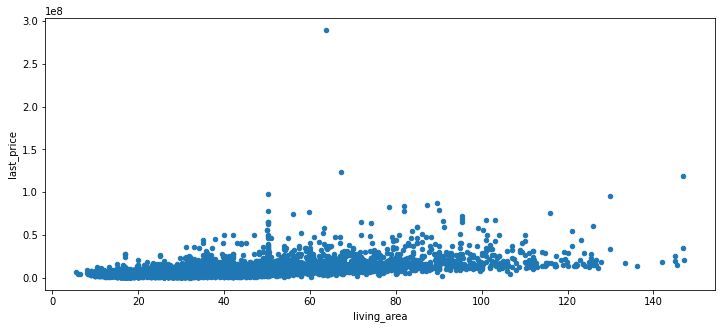

In [106]:
data.plot('living_area', 'last_price', kind='scatter', figsize=(12,5));

In [107]:
data[['living_area', 'last_price']].corr()

,living_area,last_price
living_area,1.000000,0.574405
last_price,0.574405,1.000000


Наблюдается существенная корреляция между ценой и жилой площадью

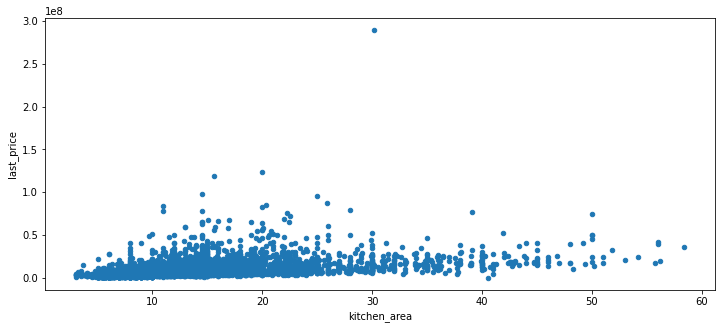

In [108]:
data.plot('kitchen_area', 'last_price', kind='scatter', figsize=(12,5));

In [109]:
data[['kitchen_area', 'last_price']].corr()

,kitchen_area,last_price
kitchen_area,1.000000,0.522366
last_price,0.522366,1.000000


Менее значимая корреляция нежели в предыдущих двух. Но тем не менее, гипотеза о том, что 3 площади имеют почти идентичную взаимосвязь, подтверждается

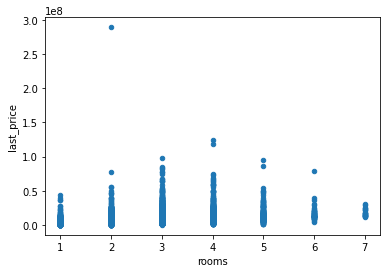

In [110]:
data.plot('rooms', 'last_price', kind='scatter');

In [111]:
data[['rooms', 'last_price']].corr()

,rooms,last_price
rooms,1.000000,0.406268
last_price,0.406268,1.000000


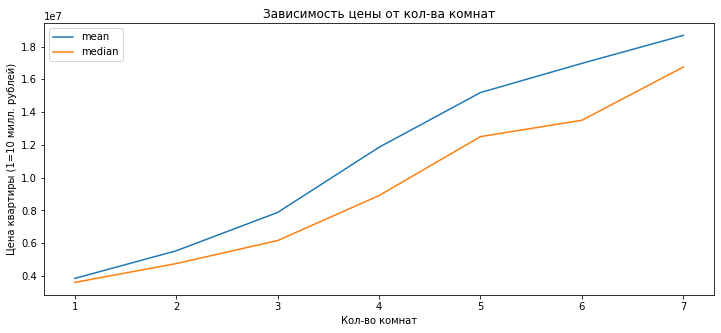

In [112]:
data.pivot_table(index='rooms', values='last_price', aggfunc=('mean', 'median')).plot(figsize=(12,5));
plt.title('Зависимость цены от кол-ва комнат');
plt.xlabel('Кол-во комнат');
plt.ylabel('Цена квартиры (1=10 милл. рублей)');

Исходя из графика и коэффициента корреляции (0.41), делаем вывод, что никакой линейная взаимосвязь между числом комнат и ценой крайне слабая. Тем не менее второй график свидетельствует о том, что кол-во комнат напрямую связано с ценой. Странно, почему этого не засекла корреляция

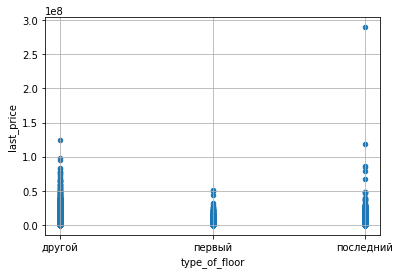

In [113]:
data.plot('type_of_floor', 'last_price', kind='scatter', grid=True);

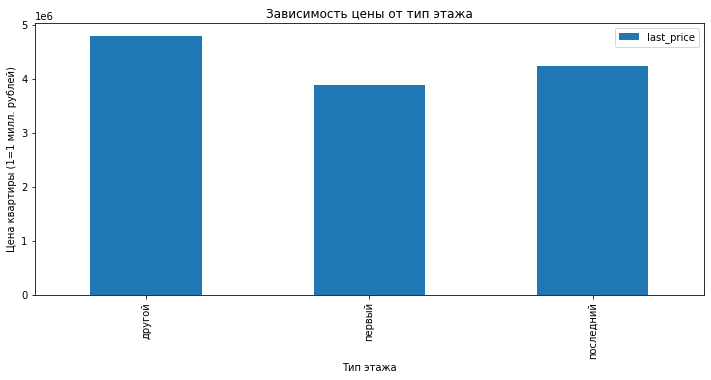

In [114]:
data.pivot_table(index='type_of_floor', values='last_price', aggfunc='median').plot(kind = 'bar', figsize=(12,5));
plt.title('Зависимость цены от тип этажа');
plt.xlabel('Тип этажа');
plt.ylabel('Цена квартиры (1=1 милл. рублей)');

Исходя из двух графиков, делаем вывод, что квартиры на первом этаже дешевле. 

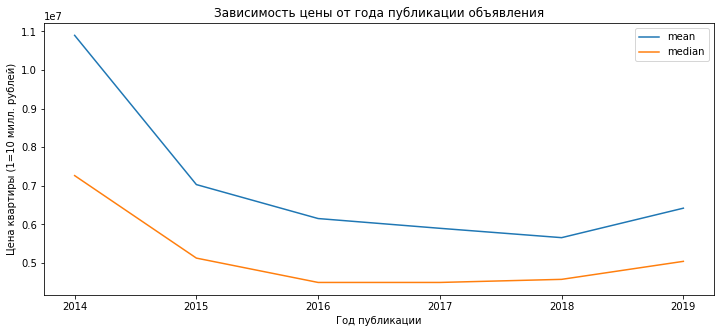

In [115]:
data.pivot_table(index='publication_year', values='last_price', aggfunc=('mean','median')).plot(figsize=(12,5));
plt.title('Зависимость цены от года публикации объявления');
plt.xlabel('Год публикации');
plt.ylabel('Цена квартиры (1=10 милл. рублей)');

Согласно графику, объявления о самых дорогих квартирах были размещены с 2014 по 2015 год, затем наблюдается постепенное снижение

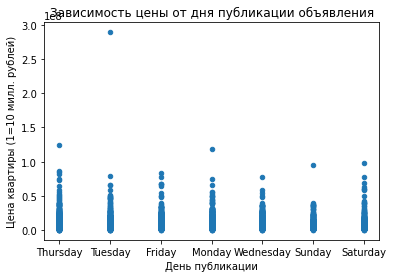

In [116]:
data['day_of_week'] = data['first_day_exposition'].dt.day_name()
data.plot('day_of_week', 'last_price', kind='scatter');
plt.title('Зависимость цены от дня публикации объявления');
plt.xlabel('День публикации');
plt.ylabel('Цена квартиры (1=10 милл. рублей)');

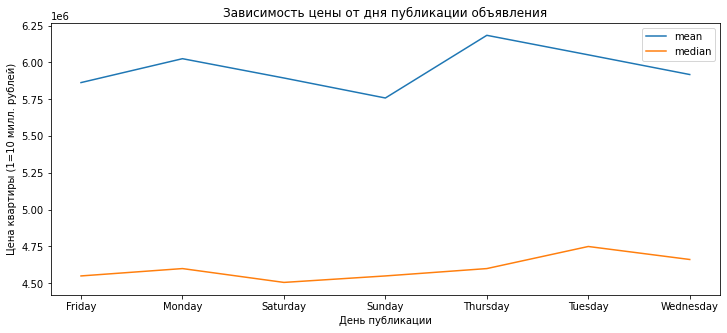

In [117]:
data.pivot_table(index='day_of_week', values='last_price', aggfunc=('mean','median')).plot(figsize=(12,5));
plt.title('Зависимость цены от дня публикации объявления');
plt.xlabel('День публикации');
plt.ylabel('Цена квартиры (1=10 милл. рублей)');

Квартиры, оъявления о которых были размещены во вторник и четверг (по разным показателям) дороже остальных

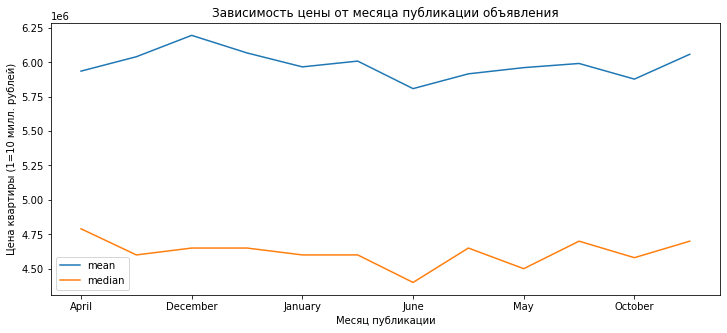

In [118]:
data['month'] = data['first_day_exposition'].dt.month_name()
data.pivot_table(index='month', values='last_price', aggfunc=('mean','median')).plot(figsize=(12,5));
plt.title('Зависимость цены от месяца публикации объявления');
plt.xlabel('Месяц публикации');
plt.ylabel('Цена квартиры (1=10 милл. рублей)');

В июне выставляют объявления о самых дешевых квартирах по обоим показателям. В остальных местах медиана и среднее расходятся во мнениях

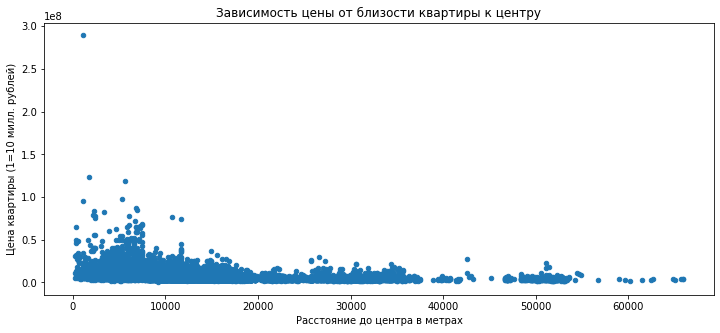

In [119]:
data.plot('cityCenters_nearest', 'last_price', kind='scatter', figsize = (12,5))
plt.title('Зависимость цены от близости квартиры к центру');
plt.xlabel('Расстояние до центра в метрах');
plt.ylabel('Цена квартиры (1=10 милл. рублей)');

In [120]:
data[['cityCenters_nearest', 'last_price']].corr()

,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,-0.290749
last_price,-0.290749,1.000000


Несмотря на то, что корреляция довольно низкая, график свидетельсвует о том, что ближе к центру больше дорогих квартир

СРЕДНЯЯ ЦЕНА ОДНОГО КВАДРАТНОГО МЕТРА В 10 НАСЕЛЕННЫХ ПУНКТОВ С НАИБОЛЬШИМ КОЛИЧЕСТВОМ ОБЪЯВЛЕНИЙ

In [121]:
data.groupby('locality_name')['price_of_squared_metr'].agg(['count', 'mean']).sort_values(by = 'count', \
            ascending=False).head(10)


,count,mean
locality_name,,
Санкт-Петербург,14804,112590.368503
поселок Мурино,490,84501.378911
поселок Шушары,428,78056.83062
Всеволожск,375,68577.111124
Пушкин,350,102640.457399
Колпино,332,75286.116082
поселок Парголово,318,90248.699605
Гатчина,299,68686.864957
деревня Кудрово,263,91795.544208


Самая высокая стоимость одного квадратного метра наблюдается в Санкт-Петербурге, самая низкая же - в Выборге.

In [122]:
top_10 = data.groupby('locality_name')['price_of_squared_metr'].agg(['count', 'mean']).sort_values(by = 'count', \
            ascending=False).head(10)
# plt.title('Top-10 settlements with the most expensive apartaments')

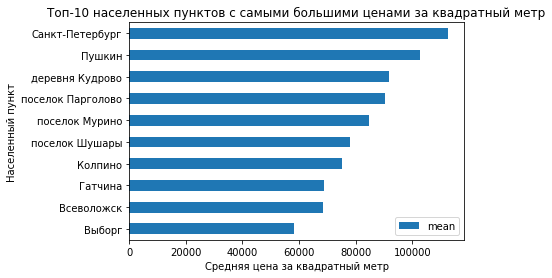

In [123]:
top_10.drop('count', axis=1).sort_values(by = 'mean',ascending=True).plot(kind='barh');
plt.xlabel('Средняя цена за квадратный метр');
plt.ylabel('Населенный пункт');
plt.title('Топ-10 населенных пунктов с самыми большими ценами за квадратный метр');

СРЕДНЯЯ ЦЕНА КАЖДОГО КИЛОМЕТРА В САНКТ-ПЕТЕРБУРГЕ (зависимость стоимости одного квадратного метра от расстояния до центра города)

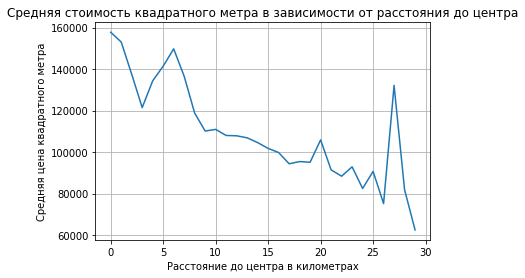

In [124]:
data.loc[data['locality_name']=='Санкт-Петербург', ['distance_to_citycentr_km', 'price_of_squared_metr']].\
groupby('distance_to_citycentr_km')['price_of_squared_metr'].agg('mean').plot(grid=True);
plt.title('Средняя стоимость квадратного метра в зависимости от расстояния до центра');
plt.xlabel('Расстояние до центра в километрах');
plt.ylabel('Средняя цена квадратного метра');

Согласно графику, наблюдается снижение цены одного квадратного метра при увеличение расстояния от центра города

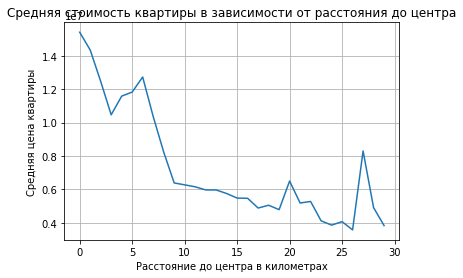

In [125]:
data.loc[data['locality_name']=='Санкт-Петербург', ['distance_to_citycentr_km', \
            'last_price']].groupby('distance_to_citycentr_km')['last_price'].agg('mean').plot(grid=True);
plt.title('Средняя стоимость квартиры в зависимости от расстояния до центра');
plt.xlabel('Расстояние до центра в километрах');
plt.ylabel('Средняя цена квартиры');

Итак, чем ближе квартиры расположены к центру, тем они дороже

### Общий вывод

Перед исследованием выполнена предобработка данных, которая включала в себя заполнение пропусков, ликвидацию аномалий и дубликатов, преобразование типов данных.
Подводя итог, важно определить ключевые закономерности, выявленные в ходе исследования:
1) На стоимость квартиры положительно влияет ее общая площадь (включая площадь кухни и жилую площадь)

2) Динамика появления объявлений носит сезонный характер

3) Квартира при выставление на продажу, в среднем (по медиане), будет продана в течение 95 дней 

4) На стоимость квартиры оказывает влияние этаж, на котором она расположена. На первом этаже квартиры, как правило, дешевле (медиана(1этаж): 3 миллиона рублей, медиана(другой): 4.5 миллиона рублей, медиана(последний): немного меньше 5 миллионов рублей)

5) Наблюдается позитивная взаимозависимость цены квартиры от кол-ва комнат (чем больше комнат, тем в среднем дороже квартира)

6) Также важно подчеркнуть, что квартиры в Санкт-Петербурге дороже, чем в остальных населенных пунктах

7) В рамках самого Санкт-Петербурга жилая площадь становится дороже по мере приближения к центру
